In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] =42
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import re
import seaborn as sns

In [2]:
df_groups = pd.read_csv("df_groups.csv")
del df_groups['Unnamed: 0']
df_groups.head()

,Number,ratings2,ratings1,counts2,counts1,dev2,dev1,Text,length,word_leng,group
0,1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,2
1,2,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,0
2,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,3
3,4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,6
4,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,6


In [3]:
df_sentim = pd.read_csv("sentiments.csv")
del df_sentim['Unnamed: 0']
df_sentim.head()

,Number,ratings2,ratings1,counts2,counts1,dev2,dev1,Text,length,word_leng,anger,joy,positivity,negativity,surprise,fear,anticipation
0,1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,0.400000,0.100000,0.300000,0.400000,0.0,0.500000,0.100000
1,2,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,0.066667,0.066667,0.133333,0.066667,0.0,0.066667,0.000000
2,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,0.166667,0.000000,0.000000,0.166667,0.0,0.000000,0.166667
3,4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,0.000000,0.000000,0.000000,0.400000,0.0,0.000000,0.000000
4,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,0.571429,0.000000,0.142857,0.142857,0.0,0.142857,0.142857


In [23]:
df = df_groups.merge(df_sentim, left_on='Number', right_on='Number', how='left')
pd.set_option("display.max_columns", 100)
df.set_index('Number')

,ratings2_x,ratings1_x,counts2_x,counts1_x,dev2_x,dev1_x,Text_x,length_x,word_leng_x,group,ratings2_y,ratings1_y,counts2_y,counts1_y,dev2_y,dev1_y,Text_y,length_y,word_leng_y,anger,joy,positivity,negativity,surprise,fear,anticipation
Number,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,2,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I ha...",30,short,0.400000,0.100000,0.300000,0.400000,0.000000,0.500000,0.100000
2,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,0,NaN,0.162989,0,35277.0,NaN,5.627972,This couple had an excellent relationship goin...,69,medium,0.066667,0.066667,0.133333,0.066667,0.000000,0.066667,0.000000
3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The ...,17,short,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667
4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,6,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a to...,21,short,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000
5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,6,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, ...",13,very short,0.571429,0.000000,0.142857,0.142857,0.000000,0.142857,0.142857
6,NaN,1.330277,0,39599.0,NaN,4.976994,Bill and Hillary Clinton are on a trip back to...,121,long,3,NaN,1.330277,0,39599.0,NaN,4.976994,Bill and Hillary Clinton are on a trip back to...,121,long,0.000000,0.033333,0.133333,0.033333,0.033333,0.000000,0.033333
7,-1.952510,-0.633947,50692,73401.0,5.370893,5.610902,How many feminists does it take to screw in a ...,14,very short,7,-1.952510,-0.633947,50692,73401.0,5.370893,5.610902,How many feminists does it take to screw in a ...,14,very short,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.716500,-0.996267,50692,73411.0,5.153371,4.968263,Q. Did you hear about the dyslexic devil worsh...,15,short,3,-0.716500,-0.996267,50692,73411.0,5.153371,4.968263,Q. Did you hear about the dyslexic devil worsh...,15,short,0.500000,0.000000,0.000000,0.500000,0.000000,0.500000,0.500000
9,NaN,-0.620039,0,30741.0,NaN,5.201667,A country guy goes into a city bar that has a ...,91,long,1,NaN,-0.620039,0,30741.0,NaN,5.201667,A country guy goes into a city bar that has a ...,91,long,0.000000,0.080000,0.120000,0.080000,0.000000,0.040000,0.120000


In [27]:
df['anticipation'].sort_values()

74     0.000000
33     0.000000
100    0.000000
35     0.000000
99     0.000000
98     0.000000
38     0.000000
39     0.000000
97     0.000000
96     0.000000
42     0.000000
95     0.000000
93     0.000000
89     0.000000
85     0.000000
47     0.000000
84     0.000000
83     0.000000
50     0.000000
51     0.000000
82     0.000000
80     0.000000
77     0.000000
72     0.000000
56     0.000000
57     0.000000
58     0.000000
59     0.000000
32     0.000000
31     0.000000
         ...   
88     0.137931
4      0.142857
68     0.142857
48     0.142857
37     0.142857
55     0.153846
105    0.159091
101    0.166667
2      0.166667
24     0.166667
120    0.181818
76     0.200000
43     0.200000
111    0.200000
94     0.200000
66     0.214286
146    0.216216
92     0.218750
122    0.222222
49     0.222222
36     0.222222
136    0.227273
130    0.250000
9      0.333333
69     0.333333
12     0.333333
78     0.333333
22     0.400000
40     0.500000
7      0.500000
Name: anticipation, Leng

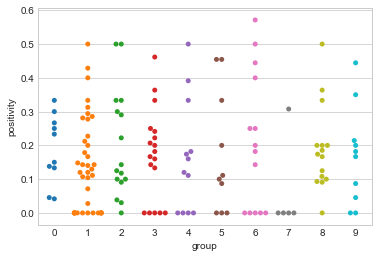

In [25]:
# https://seaborn.pydata.org/examples/scatterplot_categorical.html
sns.swarmplot(x="group", y="positivity", data=df, size=5)

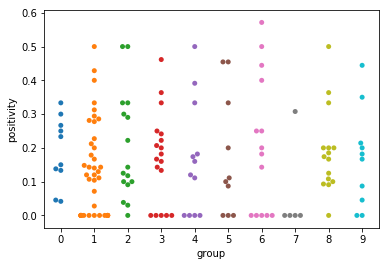

In [6]:
sns_plot = sns.swarmplot(x="group", y="positivity", data=df, size=5)
fig = sns_plot.get_figure()
fig.savefig("group_positivity.pdf")

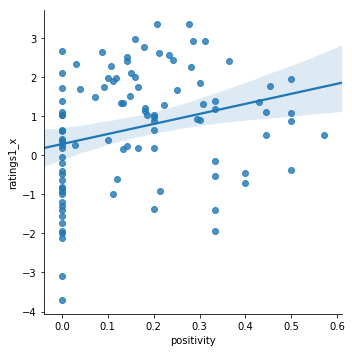

In [9]:
sns.lmplot(x="positivity", y="ratings1_x", data=df)

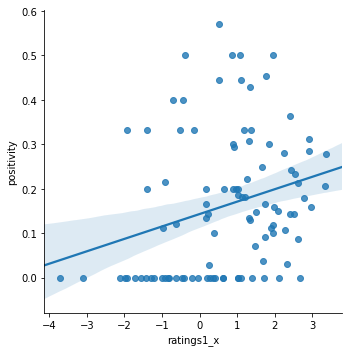

In [8]:
sns_plot = sns.lmplot(x="ratings1_x", y="positivity", data=df)
sns_plot.savefig("ratings1_positivity.pdf")

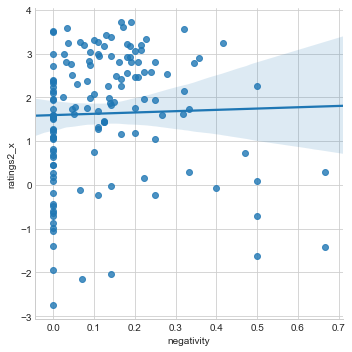

In [18]:
sns_plot = sns.lmplot(x="negativity", y="ratings2_x", data=df)
sns_plot.savefig("ratings2_negativity.pdf")

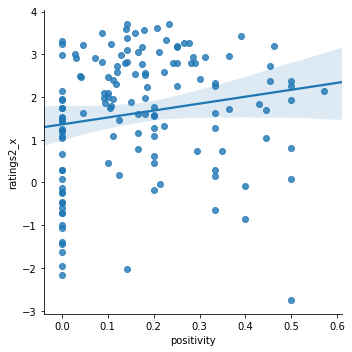

In [10]:
sns_plot = sns.lmplot(x="positivity", y="ratings2_x", data=df)
sns_plot.savefig("ratings2_positivity.pdf")

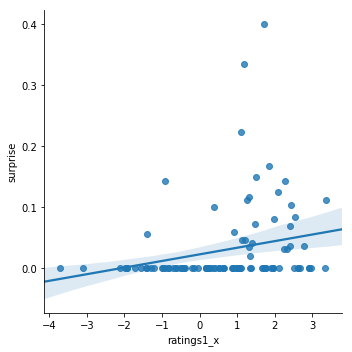

In [29]:
sns_plot = sns.lmplot(x="ratings1_x", y="surprise", data=df)
sns_plot.savefig("ratings1_surprise.pdf")

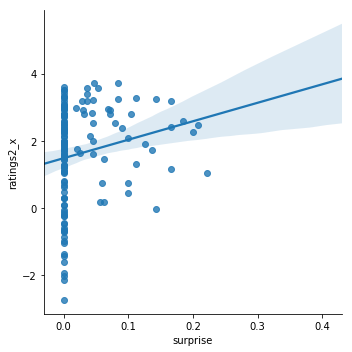

In [11]:
sns_plot = sns.lmplot(x="surprise", y="ratings2_x", data=df)
sns_plot.savefig("ratings2_surprise.pdf")

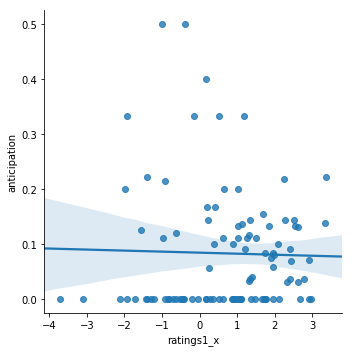

In [31]:
sns_plot = sns.lmplot(x="ratings1_x", y="anticipation", data=df)
sns_plot.savefig("ratings1_anticipation.pdf")

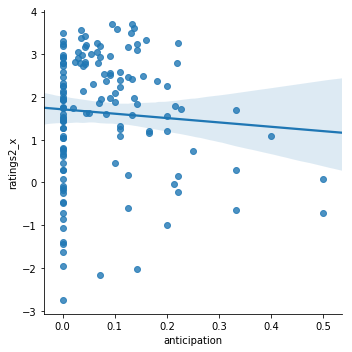

In [12]:
sns_plot = sns.lmplot(x="anticipation", y="ratings2_x", data=df)
sns_plot.savefig("ratings2_anticipation.pdf")

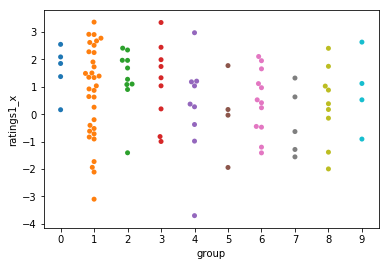

In [33]:
sns_plot = sns.swarmplot(x="group", y="ratings1_x", data=df, size=5)
fig = sns_plot.get_figure()
fig.savefig("ratings1_group.pdf")

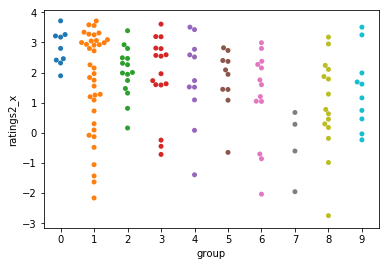

In [34]:
sns_plot = sns.swarmplot(x="group", y="ratings2_x", data=df, size=5)
fig = sns_plot.get_figure()
fig.savefig("ratings2_group.pdf")

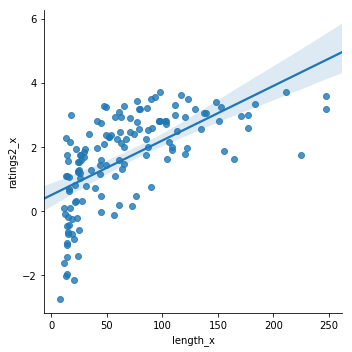

In [13]:
sns_plot = sns.lmplot(x="length_x", y="ratings2_x", data=df)
sns_plot.savefig("ratings2_length.pdf")

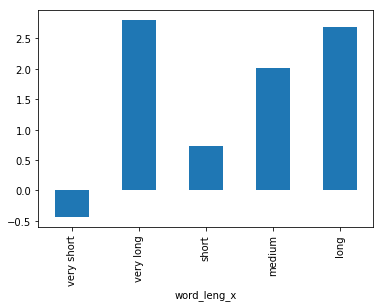

In [36]:
df.groupby('word_leng_x').ratings2_x.mean().sort_index(ascending=False).plot(kind='bar')

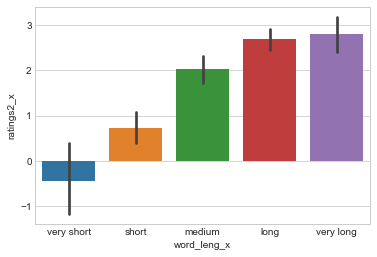

In [17]:
#sns.set_style("whitegrid")

sns_plot = sns.barplot(x="word_leng_x", y="ratings2_x", data=df, order=["very short", "short", "medium", "long", "very long"])
fig = sns_plot.get_figure()
fig.savefig("ratings2_length_bar.pdf")

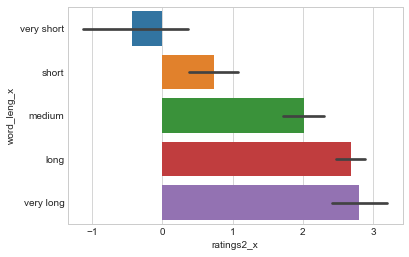

In [38]:
sns.set_style("whitegrid")
sns.barplot(x="ratings2_x", y="word_leng_x", data=df, order=["very short", "short", "medium", "long", "very long"])